# Global-terrorism-EDA-project

coded and analysed by **@Aryaroop Majumder**

### What this project requires me to do

As a security/defense analyst, I will try to do the following:- 

- Exploratory data analysis
- Try to find out the hot zone of terrorism. 
- Handle the missing value 
- Do compare the various region…. visualize it and showing it on global map would be better to understand.

**Data**<br>
The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2016 (with annual updates planned for the future). The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 170,000 cases. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.

**Content:**<br>
Geography: Worldwide <br>
Time period: 1970-2016, except 1993 (2017 in progress, publication expected June 2018) <br>
Unit of analysis: Attack <br>
Variables: More than 100 variables on location, tactics, perpetrators, targets, and outcomes

### Attribute Information

- **eventid** - A 12-digit Event ID system. First 8 numbers – date recorded -“yyyymmdd”. Last 4 numbers 
- **iyear** - The feild contains the year in which the incident occured
- **imonth** - This field contains the number of the month in which the incident occurred.
- **iday** - This field contains the numeric day of the month on which the incident occurred
- **extended** - 1 = "Yes" The duration of an incident extended more than 24 hours. 0 = "No" The duration of an incident extended less
- **country** - This field identifies the country code
- **country_txt** - This field identifies the country or location where the incident occurred.
- **region** - This field identifies the region code based on 12 regions
- **region_text** - This field identifies the region in which the incident occurred.
- **provstate** - Name (at the time of event) of the 1st order subnational administrative region
- **city** - Name of the city, village, or town in which the incident occurred
- **latitude** - The latitude of the city in which the event occurred.
- **longitude** - The longitude of the city in which the event occurred.
- **success** - Success of a terrorist strike
- **suicide** - 1 = "Yes" The incident was a suicide attack. 0 = "No" There is no indication that the incident was a suicide
- **attacktype1** - The general method of attack
- **attacktype1_txt** - The general method of attack and broad class of tactics used.
- **targettype1** - Type of target
- **targettype1_txt** - The general type of target/victim
- **targsubtype1_txt** - The more specific target category
- **target1** - The specific person, building, installation that was targeted and/or victimized
- **natlty1_txt** - The nationality of the target that was attacked
- **gname** - The name of the group that carried out the attack
- **nperps** - The total number of terrorists participating in the incident
- **weaptype1_txt** - General type of weapon used in the incident
- **weapsubtype1_txt** - More specific value for most of the Weapon Types



In [20]:
#importing the basic libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [62]:
#importing the dataset using pandas.read_csv command
data = pd.read_csv("./Global Terrorism Data (1).csv", encoding="ISO-8859-1")

In [22]:
data

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,NaN,0,NaN,182,Somalia,11,...,NaN,"""Somalia: Al-Shabaab Militants Attack Army Che...","""Highlights: Somalia Daily Media Highlights 2 ...","""Highlights: Somalia Daily Media Highlights 1 ...",START Primary Collection,0,0,0,0,NaN
181687,201712310029,2017,12,31,NaN,0,NaN,200,Syria,10,...,NaN,"""Putin's 'victory' in Syria has turned into a ...","""Two Russian soldiers killed at Hmeymim base i...","""Two Russian servicemen killed in Syria mortar...",START Primary Collection,-9,-9,1,1,NaN
181688,201712310030,2017,12,31,NaN,0,NaN,160,Philippines,5,...,NaN,"""Maguindanao clashes trap tribe members,"" Phil...",NaN,NaN,START Primary Collection,0,0,0,0,NaN
181689,201712310031,2017,12,31,NaN,0,NaN,92,India,6,...,NaN,"""Trader escapes grenade attack in Imphal,"" Bus...",NaN,NaN,START Primary Collection,-9,-9,0,-9,NaN


# Information of the dataset

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [24]:
# Understanding the dimensions of this large dataset
data.shape

(181691, 135)

In [25]:
pd.options.display.max_rows

100

Changing the output type for the lists to be displayed properly

In [26]:
pd.options.display.max_rows = 100

In [27]:
data.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [28]:
# Taking a peek at the data.

data.head()


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


## Data Cleaning

The data has 135 columns which contains mostly null values over 50% and cannot be used for any data analysis.

Hence I am only using the usefull colums that i mentioned in the **readme**

In [63]:
# Selecting only the required dataset
data.rename(columns={'iyear':'Year','imonth':'Month','city':'City','iday':'Day','country_txt':'Country','region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type','motive':'Motive'},inplace=True)
data['Casualities'] = data.Killed + data.Wounded
data=data[['Year','Month','Day','Country','Region','City','latitude','longitude','AttackType','Killed','Wounded','Casualities','Target','Group','Target_type','Weapon_type']]

data.head()

,Year,Month,Day,Country,Region,City,latitude,longitude,AttackType,Killed,Wounded,Casualities,Target,Group,Target_type,Weapon_type
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,1.0,Julio Guzman,MANO-D,Private Citizens & Property,Unknown
1,1970,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,0.0,"Nadine Chaval, daughter",23rd of September Communist League,Government (Diplomatic),Unknown
2,1970,1,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,Assassination,1.0,0.0,1.0,Employee,Unknown,Journalists & Media,Unknown
3,1970,1,0,Greece,Western Europe,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,NaN,U.S. Embassy,Unknown,Government (Diplomatic),Explosives
4,1970,1,0,Japan,East Asia,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,NaN,U.S. Consulate,Unknown,Government (Diplomatic),Incendiary


In [30]:
# Getting the info of the null values in the dataset
data.isnull().sum()
data.isna().sum()*100/len(data) #printing out the percent of null values in the data

Year           0.000000
Month          0.000000
Day            0.000000
Country        0.000000
Region         0.000000
City           0.238867
latitude       2.507554
longitude      2.508104
AttackType     0.000000
Killed         5.676120
Wounded        8.977330
Casualities    9.287196
Target         0.350045
Group          0.000000
Target_type    0.000000
Weapon_type    0.000000
dtype: float64

## Features of the datasets


In [31]:
print('Country with Highest Terrorist Attacks:',data['Country'].value_counts().index[0])
print('Regions with Highest Terrorist Attacks:',data['Region'].value_counts().index[0])
print('Maximum people killed in an attack are:',data['Killed'].max(),'that took place in',data.loc[data['Killed'].idxmax()].Country)
print('Details about the attack:')
display(data.loc[data['Killed'].idxmax()].to_frame())

Country with Highest Terrorist Attacks: Iraq
Regions with Highest Terrorist Attacks: Middle East & North Africa
Maximum people killed in an attack are: 1570.0 that took place in Iraq
Details about the attack:


,133518
Year,2014
Month,6
Day,12
Country,Iraq
Region,Middle East & North Africa
City,Tikrit
latitude,34.621521
longitude,43.668377
AttackType,Hostage Taking (Kidnapping)
Killed,1570.0


# Inferential statistics

## Univariate Analysis

In [32]:
# Getting the basic staistics of the data that i have recieved.

# Univariate Analysis

data["Killed"].describe() #shows the basic statistic of the people killed in the torrist attack from 1970-2017

count    171378.000000
mean          2.403272
std          11.545741
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        1570.000000
Name: Killed, dtype: float64

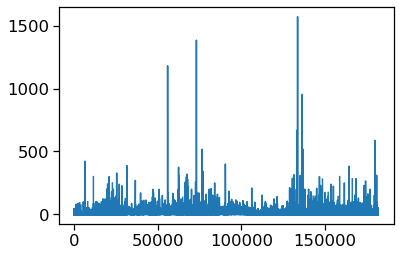

In [71]:
plt.plot(data["Killed"])
plt.show()

In [34]:
data["Wounded"].describe() #shows the basic statistic of the people wounded in the torrist attack from 1970-2017

count    165380.000000
mean          3.167668
std          35.949392
min           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
max        8191.000000
Name: Wounded, dtype: float64

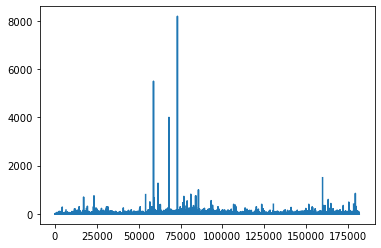

In [35]:
plt.plot(data["Wounded"])
plt.show()

In [36]:
data["Casualities"].describe() #shows the basic statistic of the casualities (killed + wounded) in the torrist attack from 1970-2017

count    164817.000000
mean          5.296128
std          42.069023
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max        9574.000000
Name: Casualities, dtype: float64

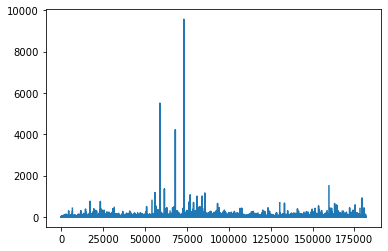

In [37]:
plt.plot(data["Casualities"])
plt.show()

### Visualising the attack in the year by the terrorist

#### Doing univariate analysis with _Year_ colummn

In [38]:
data["Year"].unique() # showing the unique values in the Year coumn

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

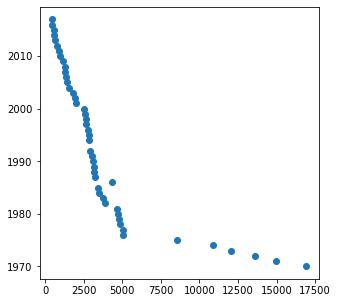

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(data["Year"].value_counts(),data["Year"].unique())
plt.show()

### Inference:-
- We can see that the terrorist attacks have increased in the fast few years.
- We can see that a cluster of dot has been formed with steep slope showing the increase in the attacks.

## Describing the dataset.

In [40]:
data.describe()

,Year,Month,Day,latitude,longitude,Killed,Wounded,Casualities
count,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,171378.000000,165380.000000,164817.000000
mean,2002.638997,6.467277,15.505644,23.498343,-4.586957e+02,2.403272,3.167668,5.296128
std,13.259430,3.388303,8.814045,18.569242,2.047790e+05,11.545741,35.949392,42.069023
min,1970.000000,0.000000,0.000000,-53.154613,-8.618590e+07,0.000000,0.000000,0.000000
25%,1991.000000,4.000000,8.000000,11.510046,4.545640e+00,0.000000,0.000000,0.000000
50%,2009.000000,6.000000,15.000000,31.467463,4.324651e+01,0.000000,0.000000,1.000000
75%,2014.000000,9.000000,23.000000,34.685087,6.871033e+01,2.000000,2.000000,4.000000
max,2017.000000,12.000000,31.000000,74.633553,1.793667e+02,1570.000000,8191.000000,9574.000000


## Data visualization

 This visualisation is done taking into account the number of people killed and in which year

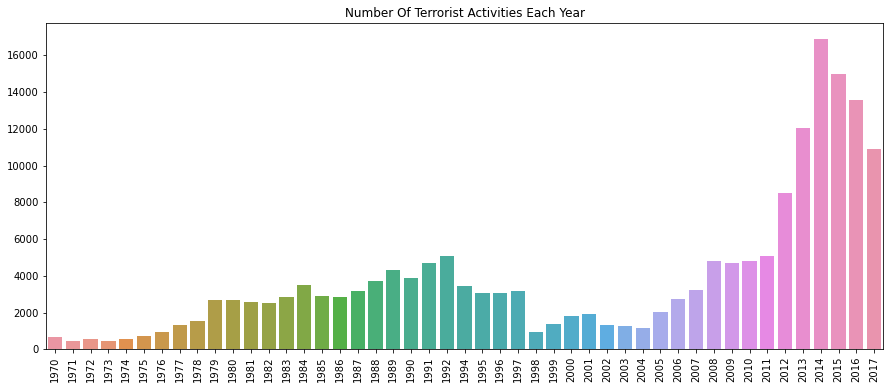

In [41]:
plt.subplots(figsize = (15,6))
sns.barplot(data['Year'].value_counts().index, data['Year'].value_counts().values)
plt.xticks(rotation=90)
plt.title('Number Of Terrorist Activities Each Year')
plt.show()

In [42]:
data["Year"].value_counts().max() #showing the maximum number of kills in the 

16903

### Inference:-
- The year 2014 has the highest number of terrorist attacks amongst all the years this we can see in the graph.
- The year 2014 had the maximum kills 16903.

### Data Visualizing the Terrosist attacks Region wise

In [43]:
data['Region'].value_counts() #showing the unique values in the Region column

Middle East & North Africa     50474
South Asia                     44974
South America                  18978
Sub-Saharan Africa             17550
Western Europe                 16639
Southeast Asia                 12485
Central America & Caribbean    10344
Eastern Europe                  5144
North America                   3456
East Asia                        802
Central Asia                     563
Australasia & Oceania            282
Name: Region, dtype: int64

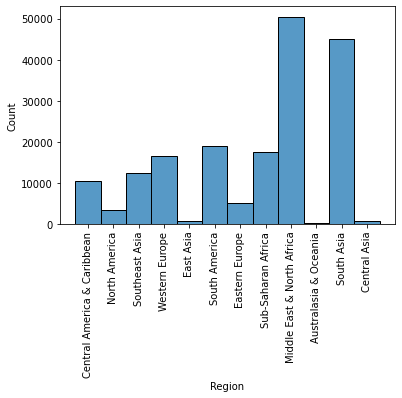

In [44]:
sns.histplot(data["Region"])
plt.xticks(rotation=90)
plt.show()

This graph shows that the most terrorist activity is seen in Middle East and North Africa followed by South Asia.

## Visualising the terrorist attacks Country wise

In [45]:
data['Country'].value_counts() #showing the unique values in the Country coumn

Iraq                   24636
Pakistan               14368
Afghanistan            12731
India                  11960
Colombia                8306
                       ...  
International              1
Wallis and Futuna          1
South Vietnam              1
Andorra                    1
Antigua and Barbuda        1
Name: Country, Length: 205, dtype: int64

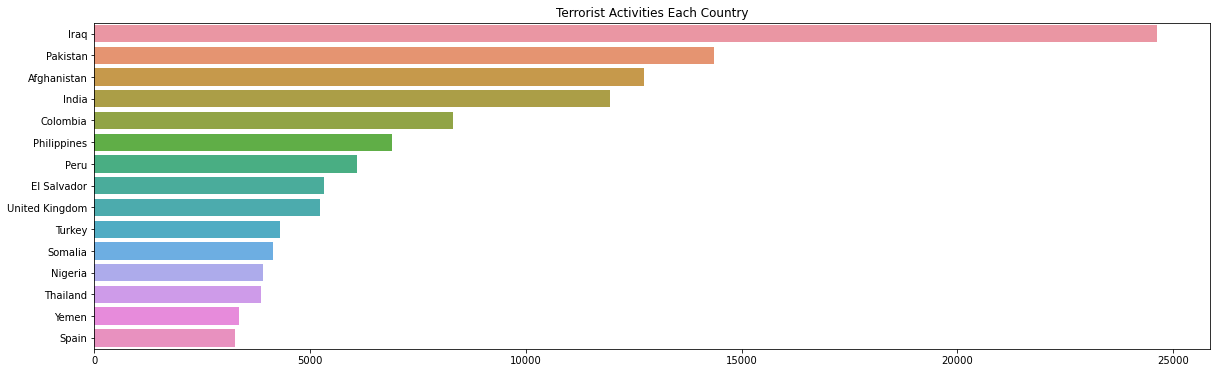

In [46]:
plt.subplots(figsize = (20,6))
sns.barplot(data['Country'].value_counts()[:15].values,data['Country'].value_counts()[:15].index)
plt.title('Terrorist Activities Each Country')
plt.show()

#### Observation:- 
- Iraq has the highest terrorist activity in the middle east region.

- My country **India** ranks the fourth in this series.

## Plotting the Terrorist group that attacked the most

In [47]:
data["Group"].unique() #showing the unique values in the Terrosist Name coumn

array(['MANO-D', '23rd of September Communist League', 'Unknown', ...,
       'Fatoni Warriors', 'Minorities of Metropolitan Attacks',
       'Baloch Republican Party'], dtype=object)

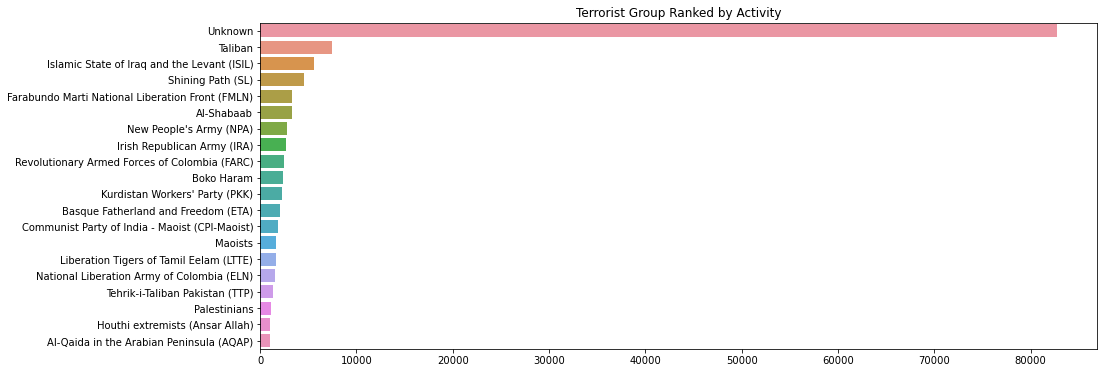

In [48]:
plt.subplots(figsize = (15,6))
sns.barplot(data['Group'].value_counts()[:20].values,data['Group'].value_counts()[:20].index)
plt.title('Terrorist Group Ranked by Activity')
plt.show()

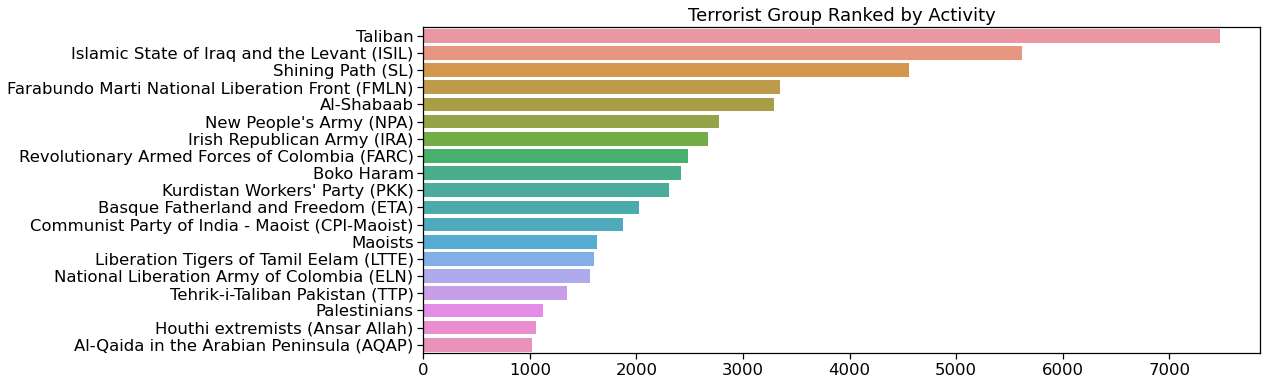

In [72]:
plt.subplots(figsize = (15,6))
sns.barplot(data['Group'].value_counts()[1:20].values,data['Group'].value_counts()[1:20].index)
plt.title('Terrorist Group Ranked by Activity')
plt.show()

#### Inference
- Taliban is the most active terrorist group.


## Plotting the targets that Terrorist group that attacked the most

In [49]:
data['Target'].value_counts() #showing the unique values in the Target coumn

Civilians                  6461
Unknown                    5918
Soldiers                   3157
Patrol                     2942
Checkpoint                 2905
                           ... 
Manager Sanat Raj             1
Military/ Police patrol       1
Thor 67 Outpost               1
Employee's Vehicle            1
Hmeymim Air Base              1
Name: Target, Length: 86006, dtype: int64

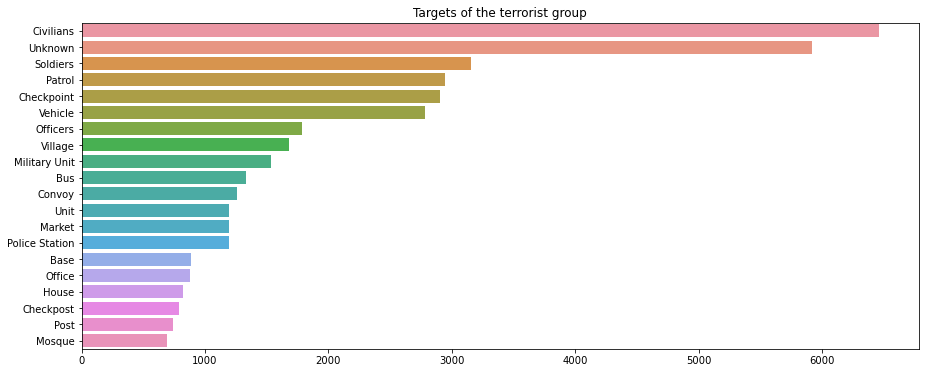

In [50]:
plt.subplots(figsize = (15,6))
sns.barplot(data['Target'].value_counts()[:20].values,data['Target'].value_counts()[:20].index)
plt.title('Targets of the terrorist group')
plt.show()

#### Inference:-

- Terrorist attacks the civilians the most
- And the least attacked place is Mosque

## Plotting which type of target Terrorist group that attacked the most

In [51]:
data['Target_type'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: Target_type, dtype: int64

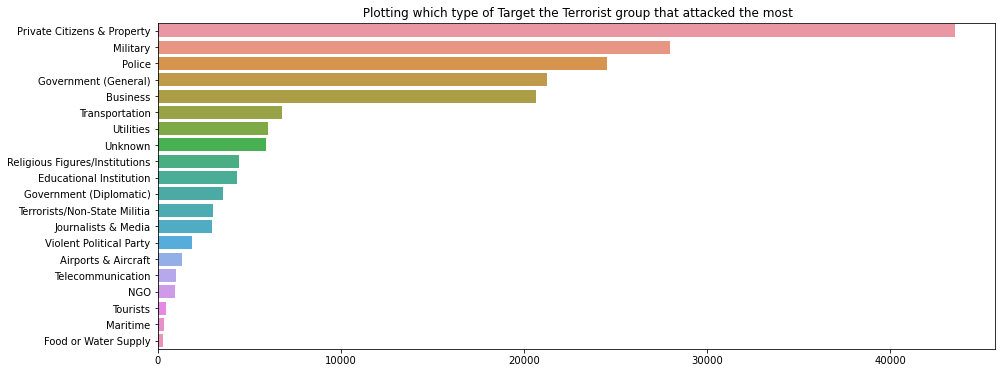

In [52]:
plt.subplots(figsize = (15,6))
sns.barplot(data['Target_type'].value_counts()[:20].values,data['Target_type'].value_counts()[:20].index)
plt.title(' Plotting which type of Target the Terrorist group that attacked the most')
plt.show()

## Inference :-
- The most attacked places or individuals are the private citizens and their property
- Followed by Military and Police which are the defense sectors of a contry

## Plotting what type of ammunition the Terrorist group that attacked the most

In [53]:
data['AttackType'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: AttackType, dtype: int64

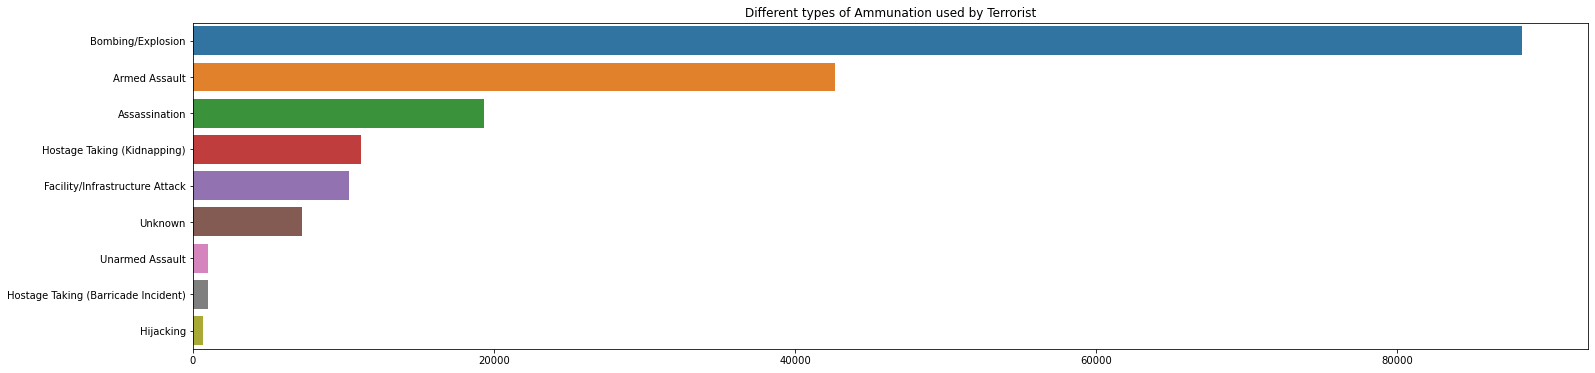

In [54]:
plt.subplots(figsize = (25,6))
sns.barplot(data['AttackType'].value_counts().values,data['AttackType'].value_counts().index)
plt.title('Different types of Ammunation used by Terrorist')
plt.show()

## Inference:-
- The most frequent way by which the terrorist groups attack is by bombing/explosion.
- The least used method is the Hijacking

# Multivariate analysis


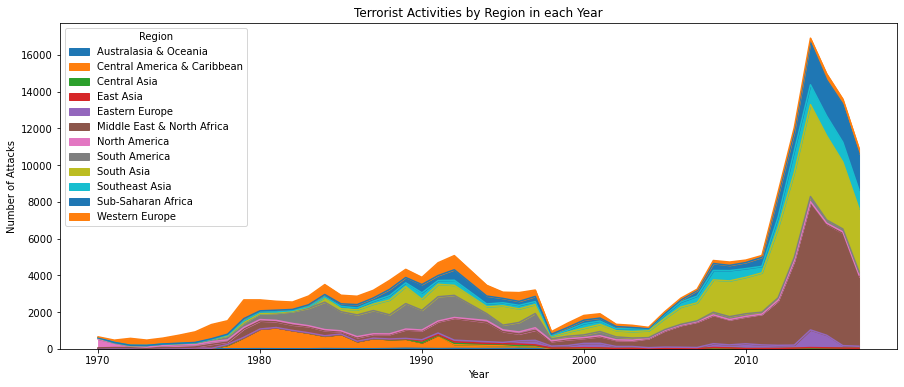

In [55]:
pd.crosstab(data.Year, data.Region).plot(kind='area',figsize=(15,6))
plt.title('Terrorist Activities by Region in each Year')
plt.ylabel('Number of Attacks')
plt.show()

#### Inference:-
- The most affected area is Sub-Saharan Africa
- And the least affected area is Eastern Europe

### Data Visualisation with HEATMAP

In [56]:
data['Wounded'] = data['Wounded'].fillna(0).astype(int)
data['Killed'] = data['Killed'].fillna(0).astype(int)
data['casualities'] = data['Killed'] + data['Wounded']

In [57]:
data1 = data.sort_values(by='casualities',ascending=False)[:40]

In [58]:
heat=data1.pivot_table(index='Country',columns='Year',values='casualities')
heat.fillna(0,inplace=True)
heat.head()

Year,1982,1984,1992,1994,1995,1996,1997,1998,2001,2004,2005,2006,2007,2008,2009,2014,2015,2016,2017
Country,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,536.0,0.0,584.0
Chad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1161.0,0.0,0.0,0.0,0.0,0.0
Ethiopia,0.0,0.0,500.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,0.0
India,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1005.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
colorscale = [[0, '#edf8fb'], [.3, '#00BFFF'],  [.6, '#8856a7'],  [1, '#810f7c']]
heatmap = go.Heatmap(z=heat.values, x=heat.columns, y=heat.index, colorscale=colorscale)
data = [heatmap]
layout = go.Layout(
    title='Top 40 Worst Terror Attacks in History from 1982 to 2016',
    xaxis = dict(ticks='', nticks=20),
    yaxis = dict(ticks='')
)
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='heatmap',show_link=False)

### History of Terrorist attacks in INDIA


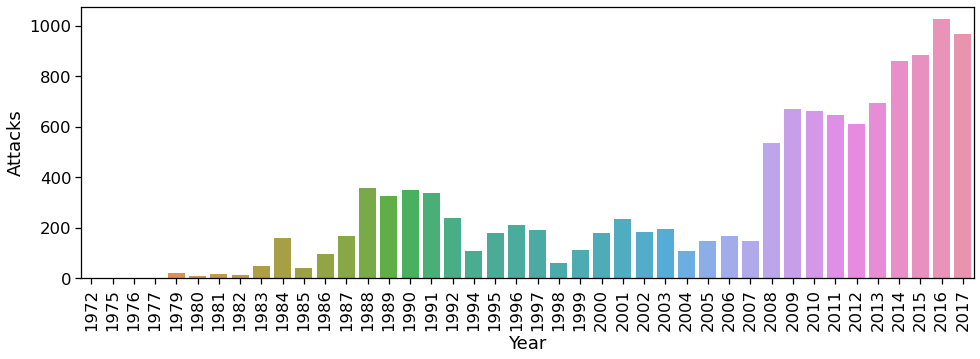

In [73]:
India=data[data['Country']=='India']
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,5))
v1=India['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)
plt.show()

## Inference
- The maximun attacks were on 2016 in the country of India

### History of Terrorist attacks in IRAQ

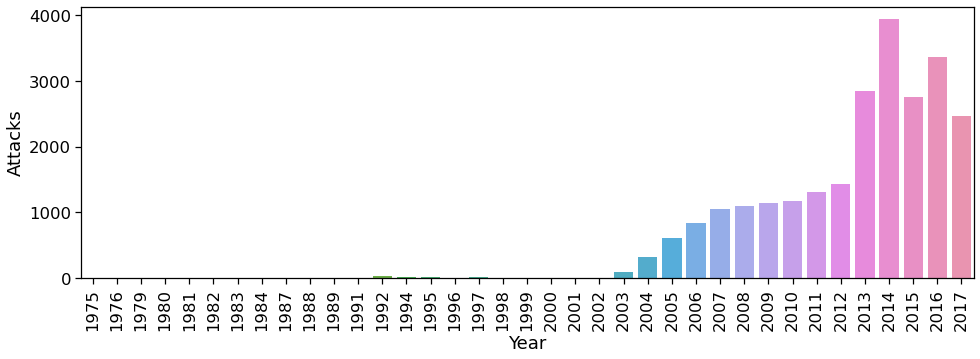

In [74]:
Iraq=data[data['Country']=='Iraq']
sns.set_context(context='notebook',font_scale=1.5)
plt.figure(figsize=(16,5))
v1=Iraq['Year'].value_counts().to_frame().reset_index().rename(columns={'index':'Year','Year':'Attacks'}).sort_values(by='Year')
sns.barplot(data=v1,x='Year',y='Attacks',ci=None)
plt.xticks(rotation=90)
plt.show()

Inference:-
* There were almost no terrorism activities in Iraq before 2003.
* We can see almost 2 fold rise in attacks after 2012.

# Conclusion


Based on 46 years data obtained from The Global Terrorism Database (GTD), I can say this following facts:<br>
- *Iraq is the largest country with terrorism incidents (22130 incidents).*

- Andorra, Antigua and Barbuda, Brunei, Falkland Islands, New Hebrides, North Korea, South Vietnam, St. Lucia, Vatican, Wallis and Futuna are the safest countries with only 1 incident from 1970 - 2017.

- The top 10 countries with the most terrorism incidents, there are 2 countries from Europe: United Kingdom and Turkey.

- *My country, India is 4th with 10978 events.*
- previously active groups as the IRA have now reduced to nothingness
- New terrorist groups that have risen very recently are casuing more deadly attacks